In [1]:
#Import all necessary libraries
import numpy as np
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format
import matplotlib.pyplot as plt
%matplotlib inline

# Question 3:
### What has been the overall trend of graduation rates year over year in NYC between males and females?

To tackle this subquestion, we’ll just be using the NYC Graduation Rate Database. Currently there’s a separate CSV for each year’s data between 2015-2020. Our first step will be to read each of these CSV files in and concatenate them.

In [2]:
grad2020 = pd.read_csv("GRAD_RATE_AND_OUTCOMES_2020.csv")
grad2019 = pd.read_csv("GRAD_RATE_AND_OUTCOMES_2019.csv")
grad2018 = pd.read_csv("GRAD_RATE_AND_OUTCOMES_2018.csv")
grad2017 = pd.read_csv("GRAD_RATE_AND_OUTCOMES_2017.csv")
grad2016 = pd.read_csv("GRAD_RATE_AND_OUTCOMES_2016.csv")
grad2015 = pd.read_csv("GRAD_RATE_AND_OUTCOMES_2015.csv")

/Users/alexandradrossos/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (5,7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
/Users/alexandradrossos/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


I noticed in the code documentation that the column names for years 2015-2018 were upper cased, but the 2020 data columns were uppercased. For us to be able to concatenate these, we need to first convert the columns to be all lowercase. 

In [3]:
grad2018.columns = map(str.lower, grad2018.columns)
grad2017.columns = map(str.lower, grad2017.columns)
grad2016.columns = map(str.lower, grad2016.columns)
grad2015.columns = map(str.lower, grad2015.columns)

Now we can concatenate these CSVs together and check that 2015-2020 are all accounted for in our new dataset. 

In [4]:
gradyears = [grad2015,grad2016,grad2017,grad2018,grad2019,grad2020]
yc = pd.concat(gradyears)
yc.report_school_year.unique()

array(['2014-15', '2015-16', '2016-17', '2017-18', '2018-19', '2019-20'],
      dtype=object)

One more data cleaning step we need to make is changing the school year column to match the police shooting incident data that we will be using in later questions. We'll be using the year of graduation as our reference point. For example, the school year marked 2014-15 will be changed to 2015. We'll now alter those row values for the report_school_year column and check that the output is appropriate for our x axis.

In [5]:
yc['report_school_year'] = yc['report_school_year'].replace(['2014-15'],'2015')
yc['report_school_year'] = yc['report_school_year'].replace(['2015-16'],'2016')
yc['report_school_year'] = yc['report_school_year'].replace(['2016-17'],'2017')
yc['report_school_year'] = yc['report_school_year'].replace(['2017-18'],'2018')
yc['report_school_year'] = yc['report_school_year'].replace(['2018-19'],'2019')
yc['report_school_year'] = yc['report_school_year'].replace(['2019-20'],'2020')
yc.report_school_year.unique()

array(['2015', '2016', '2017', '2018', '2019', '2020'], dtype=object)

Now we can do the real data cleaning. For this analysis, we want to look at the graduation rate at a state level and segment it by gender. To accomplish this our first step will be to just select the rows for each year that are aggregated at the state level, and this can be done by selecting rows with column aggregation_code = 0 (see documentation for more information on this). 

In [6]:
yc = yc[yc["aggregation_index"] == 0]

We also only want the graduation rate for students completing their degree in 4 years, meaning we have to only select the rows with membership_code column = 9 (see documentation for more information on this). 

In [7]:
yc = yc[yc["membership_code"] == 9]

Lastly, we need to find the subgroup_code representing the groups for females and males so that we can see the comparison over the years 2015 to 2020. Let's look at the output for subgroup_code and subgroup_name below.

In [8]:
yc[['subgroup_code', 'subgroup_name']]

,subgroup_code,subgroup_name
36,1,All Students
37,2,Female
38,3,Male
39,4,American Indian or Alaska Native
40,5,Black or African American
...,...,...
67,21,Not Homeless
68,22,In Foster Care
69,23,Not in Foster Care
70,24,Parent in Armed Forces


From the output above, we can see that subgroup_code value of 2 represents the graduation rate among female students, and a subgroup_code value of 3 represents the graduation rate among male students. So let's create two dataframes segmenting between these two groups before we plot. 

In [9]:
yc_f = yc[yc["subgroup_code"] == 2]
yc_m = yc[yc["subgroup_code"] == 3]
yc_f["grad_cnt"] = yc_f["grad_cnt"].astype(str).astype(float)
yc_m["grad_cnt"] = yc_m["grad_cnt"].astype(str).astype(float);

<ipython-input-9-1cf2221a7278>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yc_f["grad_cnt"] = yc_f["grad_cnt"].astype(str).astype(float)
<ipython-input-9-1cf2221a7278>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yc_m["grad_cnt"] = yc_m["grad_cnt"].astype(str).astype(float);


Now that we have our data, we can create the plot for Graduation Rate in NYC from 2015-2020 and try to draw insights from it. 

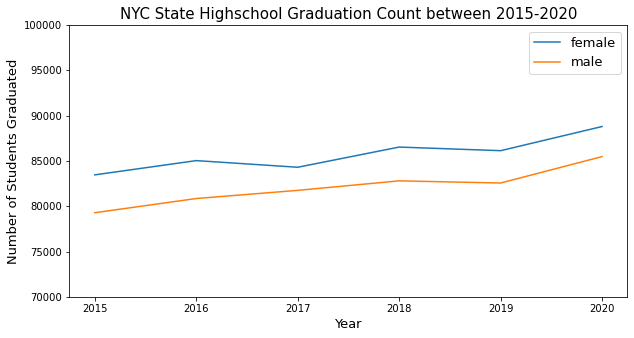

In [10]:
fig1 = plt.figure(figsize=(10, 5))
ax1 = fig1.add_subplot(1,1,1)
ax1.plot(yc_f["report_school_year"],yc_f["grad_cnt"], label = 'female')
ax1.plot(yc_m["report_school_year"],yc_m["grad_cnt"], label = 'male')
ax1.set_title('NYC State Highschool Graduation Count between 2015-2020', fontsize=15)
ax1.set_ylabel('Number of Students Graduated', fontsize=13)
ax1.set_xlabel('Year', fontsize=13)
ax1.set_ylim(70000,100000)
plt.legend(fontsize = 13)
plt.show()

There are two main insights I can see with this plot. Firstly, it's clear that the count of female students graduating is consistently higher than the count of male students graduating year over year. Secondly, both graduation counts for male and female have risen between 2015 and 2020. However, this increase is not very drastic. In the case of female students, between 2015 and 2020 the graduation count only rose from 83,459 to 88,795 which constitutes a 6% increase. Similarly, the male student graduation count only rose from 79,281 to 85,476 which is also a 6% increase. So, this is not a very notable increase.

# Question 4:
### What relationship do graduation rate and dropout rate have with NYPD shooting incident rates year over year?

For this question, we already have the graduation rate and dropout rate data cleaned. Now we just need to bring in the NYPD shooting incident data and clean it up for our purposes. To answer this question we'll have two separate plots in our figure, one with dropout count vs. number of police shootings by year and the other with graduation count.  

First, we must create a new dataframe from the graduation rate data representing all students for a particular year, thereby removing the filter that separated female and male students used in Question 3. The subgroup_code representing all students was determined to be 1, so we will filter on this value and then pull the graduation count and dropout count columns from there. See output data below.

In [11]:
gr_all = yc[yc["subgroup_code"] == 1]
gr_all[['report_school_year','grad_cnt','dropout_cnt']]

,report_school_year,grad_cnt,dropout_cnt
36,2015,162740,13840
34,2016,165880,13431
34,2017,166047,12927
36,2018,169325,12736
48,2019,168688,12830
48,2020,174271,10580


Now let's read in the NYPD shooting incident data and take a look at some of the rows. 

In [12]:
shootings = pd.read_csv("NYPD_Shooting_Incident_Data__Historic_.csv")
shootings.head()

,INCIDENT_KEY,OCCUR_DATE,OCCUR_TIME,BORO,PRECINCT,JURISDICTION_CODE,LOCATION_DESC,STATISTICAL_MURDER_FLAG,PERP_AGE_GROUP,PERP_SEX,PERP_RACE,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lon_Lat
0,201575314,08/23/2019,22:10:00,QUEENS,103,0.00,NaN,False,NaN,NaN,NaN,25-44,M,BLACK,1037451,193561,40.70,-73.81,POINT (-73.80814071699996 40.697805308000056)
1,205748546,11/27/2019,15:54:00,BRONX,40,0.00,NaN,False,<18,M,BLACK,25-44,F,BLACK,1006789,237559,40.82,-73.92,POINT (-73.91857061799993 40.81869973000005)
2,193118596,02/02/2019,19:40:00,MANHATTAN,23,0.00,NaN,False,18-24,M,WHITE HISPANIC,18-24,M,BLACK HISPANIC,999347,227795,40.79,-73.95,POINT (-73.94547965999999 40.791916091000076)
3,204192600,10/24/2019,00:52:00,STATEN ISLAND,121,0.00,PVT HOUSE,True,25-44,M,BLACK,25-44,F,BLACK,938149,171781,40.64,-74.17,POINT (-74.16610830199996 40.63806398200006)
4,201483468,08/22/2019,18:03:00,BRONX,46,0.00,NaN,False,25-44,M,BLACK HISPANIC,18-24,M,BLACK,1008224,250621,40.85,-73.91,POINT (-73.91333944399999 40.85454734900003)


It looks like each row accounts for a shooting incident and has the date. What we'll need to do to refactor this data into the form for our plot is get the count of rows by year. To do that, I'll need to pull the year out of the OCCUR_DATE column and then use value_counts(). We also need to filter this data to only show values starting in 2015, because this data goes back a lot farther. See the transformed output below:

In [13]:
shootings['year'] = pd.DatetimeIndex(shootings['OCCUR_DATE']).year
shootings_by_year = pd.DataFrame(shootings.year.value_counts().reset_index().values, columns=["Year", "Num_Shootings"])
shootings_filtered = shootings_by_year[shootings_by_year['Year'] >= 2015]
shootings_filtered.sort_values('Year')

,Year,Num_Shootings
9,2015,1434
11,2016,1208
12,2017,969
14,2018,951
13,2019,967
2,2020,1942


Now we'll join the two outputs together on the year column. However, for the join to work, we have to rename the graduation year column to match the police shooting incident data year column. In addition, the type of the year column must both be integers. We'll make these last cleaning changes below.

In [14]:
gr_all = gr_all.rename(columns={"report_school_year": "Year"})
gr_all["Year"] = gr_all["Year"].astype(str).astype(int)
gr_all["dropout_cnt"] = gr_all["dropout_cnt"].astype(str).astype(int)

In [15]:
#Grad data merged with shooting data
out = pd.merge(gr_all,shootings_filtered,on='Year')
out[['Year','grad_cnt','dropout_cnt','Num_Shootings']]

,Year,grad_cnt,dropout_cnt,Num_Shootings
0,2015,162740,13840,1434
1,2016,165880,13431,1208
2,2017,166047,12927,969
3,2018,169325,12736,951
4,2019,168688,12830,967
5,2020,174271,10580,1942


Using the data above, we can plot.

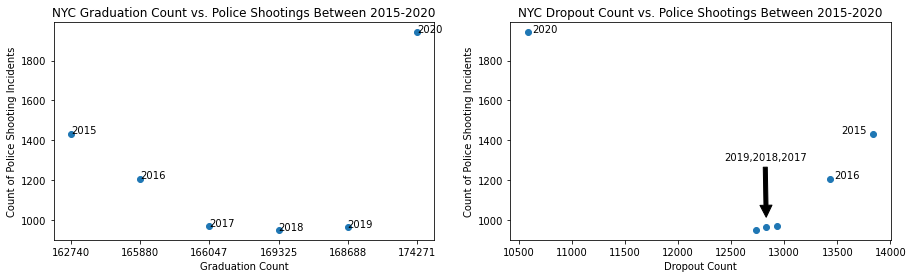

In [17]:
fig2 = plt.figure(figsize=(15, 4))
ax = fig2.add_subplot(121)
ax2 = fig2.add_subplot(122)

ax.set_title('NYC Graduation Count vs. Police Shootings Between 2015-2020')
ax.scatter('grad_cnt', 'Num_Shootings', data = out)
ax.set_ylabel('Count of Police Shooting Incidents')
ax.set_xlabel('Graduation Count')

for i in range(out.shape[0]):
    ax.text(x = out.grad_cnt[i], y = out.Num_Shootings[i], s = out.Year[i])

ax2.set_title('NYC Dropout Count vs. Police Shootings Between 2015-2020')
ax2.scatter(out.dropout_cnt, out.Num_Shootings)
ax2.set_ylabel('Count of Police Shooting Incidents')
ax2.set_xlabel('Dropout Count')
ax2.text(x = out.dropout_cnt[out.Year == 2020] + 40, y = out.Num_Shootings[out.Year == 2020], s = "2020")
ax2.text(x = out.dropout_cnt[out.Year == 2016] + 40, y = out.Num_Shootings[out.Year == 2016], s = "2016")
ax2.text(x = out.dropout_cnt[out.Year == 2015] - 300, y = out.Num_Shootings[out.Year == 2015], s = "2015")
ax2.annotate("2019,2018,2017", xy = (12830, 1000), 
            xytext = (12830-400, 1000+300),
            arrowprops=dict(facecolor='black', shrink=0.05))
plt.show()

These plots show many insights. On the left hand plot, we can clearly see that first of all, graduation counts are increasing year over year (this was also shown in Q3). However, now we can also see the relationship between high school graduation count and shooting incidents. Between 2015 and 2019, as graduation counts increase, the number of police shootings decreased by almost 28%. That's a significant decrease. Now of course, we can't discount that there are certaintly other factors at play here, but this is still an interesting finding. We can also see that in 2020, when graduation rates were at their highest, the number of police shooting incidents also shot up. This holds up logically as we've seen crime spike especially in NYC during COVID. The findings from the right plot are more just sanity checks, and they hold up. The dropout count has been decreasing from 2015-2020 and as have police shooting incidents, apart from 2020. 